In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys, os, re, time
import numpy as np
import cv2
import android

In [18]:
!adb devices

List of devices attached
02157df288f41912	device



In [19]:
!adb forward tcp:9999 tcp:49999
        


In [58]:
droide = android.Android()

delay = droide.dialogGetInput(
'Entrada 1', 'Demora antes de iniciar?', '15').result

numOfShots = droide.dialogGetInput(
'Entrada 2', 'Total de imagenes a capturar?', '5').result

delayBetweenShots = droide.dialogGetInput(
'Entrada 3', 'Demora (segs) entre capturas?', '2').result

In [49]:
droide = android.Android()
droide.ttsSpeak('Tomando fotos en' + delay + 'segundos')
time.sleep(int(delay))
counter = 1
droide.ttsSpeak('Comenzamos')

while counter <= int(numOfShots):
    droide.ttsSpeak('Tomando foto' + str(counter))
    #Tomar la foto
    droide.cameraCapturePicture('/sdcard/DCIM/CAMERA/Clase/foto_' + str(counter) + '_.jpg',True,1)
    #Extraer la foto del Android a la carpeta local
    os.system('adb pull /sdcard/DCIM/CAMERA/Clase/foto_' + str(counter) + '_.jpg')
    counter += 1
    if counter != int(numOfShots):
        time.sleep(int(delayBetweenShots))
print 'Hecho sin errores...'

droide.ttsSpeak('Terminado sin errores...')

del droide

Hecho sin errores...


In [33]:
!adb pull /sdcard/DCIM/CAMERA/Clase/ ./

pull: building file list...
pull: /sdcard/DCIM/CAMERA/Clase/foto_5_.jpg -> ./foto_5_.jpg
pull: /sdcard/DCIM/CAMERA/Clase/foto_4_.jpg -> ./foto_4_.jpg
pull: /sdcard/DCIM/CAMERA/Clase/foto_3_.jpg -> ./foto_3_.jpg
pull: /sdcard/DCIM/CAMERA/Clase/foto_2_.jpg -> ./foto_2_.jpg
pull: /sdcard/DCIM/CAMERA/Clase/foto_1_.jpg -> ./foto_1_.jpg
5 files pulled. 0 files skipped.
4821 KB/s (4825306 bytes in 0.977s)


Encontramos 1 faces!


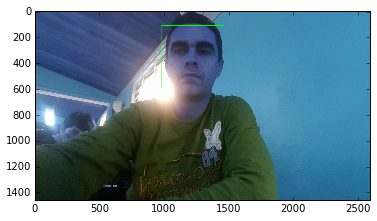

In [34]:
pic = os.path.join('.','foto_1_.jpg')

img=cv2.imread(pic)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
caras_cascada=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
caras = caras_cascada.detectMultiScale(gray, 1.3, 3)
print "Encontramos {0} faces!".format(len(caras))
i=img.copy()
for (x,y,w,h) in caras:
    cv2.rectangle(i, (x,y), (x+w,y+h), (0,255,0), 2)
plt.imshow(i)

In [43]:
pic1 = os.path.join('.','foto_1_.jpg')
img1=cv2.imread(pic1)

pic2 = os.path.join('.','foto_2_.jpg')
img2=cv2.imread(pic2)

pic3 = os.path.join('.','foto_3_.jpg')
img3=cv2.imread(pic3)

pic4 = os.path.join('.','foto_4_.jpg')
img4=cv2.imread(pic4)

pic5 = os.path.join('.','foto_5_.jpg')
img5=cv2.imread(pic5)

In [ ]:
#rotar imagenes
img = cv2.imread(pic,0)

r,c = img.shape
M = cv2.getRotationMatrix2D((c/2, r/2), 270, 1)

dst = cv2.warpAffine(img, M, (c, r))


Hecho sin errores...
16327.4466108


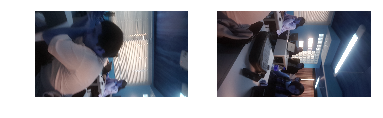

29304.6768709


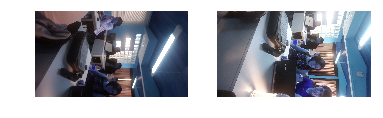

2759.31487382


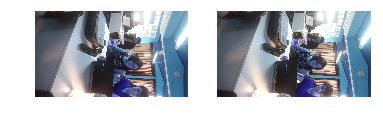

7110.06793246


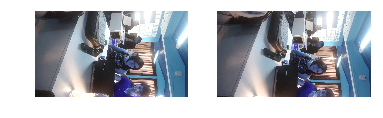

In [57]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
 
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	# s = ssim(imageA, imageB)
 
	# setup the figure
	fig = plt.figure(title)
	#plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the images
	plt.show()
    
droide = android.Android()
droide.ttsSpeak('Tomando fotos en' + delay + 'segundos')
time.sleep(int(delay))
counter = 1
droide.ttsSpeak('Comenzamos')

while counter <= int(numOfShots):
    droide.ttsSpeak('Tomando foto' + str(counter))
    #Tomar la foto
    droide.cameraCapturePicture('/sdcard/DCIM/CAMERA/Clase/foto_' + str(counter) + '_.jpg',True,1)
    #Extraer la foto del Android a la carpeta local
    os.system('adb pull /sdcard/DCIM/CAMERA/Clase/foto_' + str(counter) + '_.jpg')
    counter += 1
    if counter != int(numOfShots):
        time.sleep(int(delayBetweenShots))
print 'Hecho sin errores...'

droide.ttsSpeak('Terminado sin errores...')


    
counter = 2

while counter <= int(numOfShots):
    pic2 = os.path.join('.','foto_' + str(counter) + '_.jpg')
    img2=cv2.imread(pic2)
    
    pic1 = os.path.join('.','foto_' + str(counter - 1) + '_.jpg')
    img1=cv2.imread(pic1)
    
    
    m = mse(img1, img2)
    print m
    if m > 1000:
        compare_images(img1, img2, 'prueba')
    else:
        droide.ttsSpeak('No se detectó movimiento en la foto'+ str(counter))
    counter += 1
    
del droide